In [48]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import root_mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet"
df = pd.read_parquet(url)

In [7]:
df.head(0)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


In [20]:
def read_dataframe(url):
  df = pd.read_parquet(url)

  # compute duration in minutes
  df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
  df.duration = df.duration.apply(lambda x: x.total_seconds()) / 60

  # filter data based on trip duration
  df = df.loc[(df.duration >= 1) & (df.duration <= 60), :]

  return df

In [21]:
df = read_dataframe("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet")

In [36]:
def feature_preparation(df, dv=None):
  # select model variables
  categorical = ['PULocationID', 'DOLocationID']
  numerical = ['trip_distance']
  target = 'duration'

  df[categorical] = df[categorical].astype(str)

  # dataframe to dictionaries
  data_dicts = df[categorical + numerical].to_dict(orient='records')

  if dv:
    X = dv.transform(data_dicts)
  else:
    dv = DictVectorizer()
    X = dv.fit_transform(data_dicts)
    
  y = df[target].values

  return X, y, dv

In [37]:
X, y, dv = feature_preparation(df)

9.838799799829628


<Axes: ylabel='Density'>

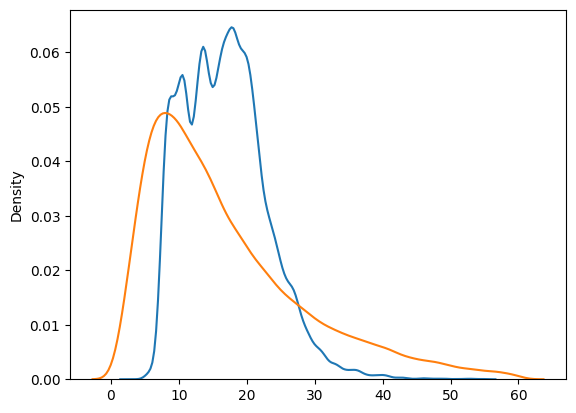

In [51]:
# LINEAR REGRESSION
# train model & generate predictions
lr = LinearRegression()
lr.fit(X, y)
preds = lr.predict(X)

# evalute RMSE
rmse = root_mean_squared_error(preds, y)
print(rmse)

# plot predictions vs truth
# sns.distplot(preds, label='prediction')
# sns.distplot(y, label='actual')
sns.kdeplot(preds)
sns.kdeplot(y)

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ])